## Анализ рынка компьютерных игр

Проек направлен на изучение и анализ рынка компьютеных игр, с целью выбора наиболее потенциально популярных продуктов и 
планировать рекламные кампании.  
<b>Данные:</b> исторические данные о продажах игр за 2016 год, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  

<b>Описание полей:</b> 
*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB 

#### Импорт данных

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
pd.options.display.float_format = '{:.2f}'.format
import warnings


#### Загрузка данных

In [2]:
try:
    data=pd.read_csv( 'C:/Users/elve/Desktop/Обучение/data/games.csv', sep=',')
except:
    data=pd.read_csv('/datasets/games.csv', sep=',')



#### Обработка данных:

In [3]:
# Переведем все названия столбцов в нижней регистр
data.columns=data.columns.str.lower()
# Определим кол-во пропусков
#display(data.isna().sum())
# Удалим строчки, у которых отсутствует"name" и "year_of_release"
data= data.dropna(subset=['name','year_of_release']) 
# Изменим типы данных:
data['user_score'] = np.where(data['user_score']=='tbd', 'NaN', data['user_score'])
data['user_score']=data['user_score'].astype(float)
data['year_of_release']=data['year_of_release'].astype('int')
# Проверка на явные дубликаты
print('Кол-во дубликатов:',data.duplicated().sum())


# Оценим рейтинг с "NaN" как RP («Рейтинг ожидается»)
data['rating']=data['rating'].fillna('RP')
# Заменим пропуски в рейтингах на медианное значение по жанру.
genre_median=data.pivot_table(index='genre', values=['critic_score','user_score'], aggfunc='median')
genre_median=genre_median.rename(columns={"critic_score": "critic_score+","user_score": "user_score+"})
#display(genre_median.head(20))
data=data.join(genre_median,on='genre')
data['critic_score']=data['critic_score'].fillna(-1)
data['user_score']=data['user_score'].fillna(-1)
#print(data['rating'].value_counts())
print()
print('Кол-во нулевых позиций:')
display(data.isna().sum())
data.drop(['critic_score+','user_score+'], inplace=True, axis=1)
data.info()

Кол-во дубликатов: 0

Кол-во нулевых позиций:


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
critic_score+      0
user_score+        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


<b>Вывод:</b>  
В данных отсутствовали дубликаты.  
Был изменен тип данных у столбцов: 'year_of_release' и  'user_score'.  
Строки с пропусками по 'year_of_release', 'name' удалены, так как потеря данных не нанесет ущерб выборки.  
Значение 'user_score'='tbd' было заменено на NaN (неопределено)  
Для уборки пропусков в рейтингах (critic_score, user_score) были рассчитаны медианные значения по жанрам и подставлены в пропуски.


In [4]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-------------------------')
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-------

#### Добавляем расчётное поле

In [5]:
# Рассчитываем общие продажи
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [6]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00,16444.00
mean,2006.49,0.26,0.15,0.08,0.05,32.98,2.69,0.54
std,5.88,0.82,0.51,0.31,0.19,36.30,4.17,1.56
min,1980.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,2007.00,0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,2010.00,0.24,0.11,0.04,0.03,70.00,7.30,0.47
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70,82.54


In [7]:

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.00,-1.00,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.00,-1.00,RP,31.38


#### Исследовательский анализ данных

Text(0.5, 0, 'Год')

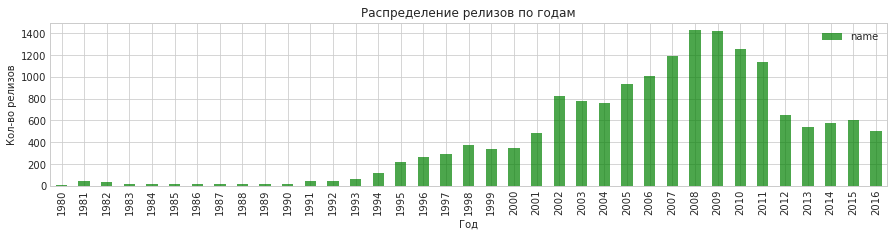

In [8]:
# Создаем распределение по годам.
release=data.pivot_table(index='year_of_release', values=['name'], aggfunc='count')
# Визуализация
with plt.style.context('seaborn-whitegrid'):
    release.plot(kind='bar',figsize=(15,3),color='green',alpha=0.7)
    plt.title('Распределение релизов по годам')
plt.ylabel('Кол-во релизов')
plt.xlabel('Год')
    

Вывод: *Важны ли данные за все периоды? * Нет, не важны и для дальнейшего исследования допустимо сократить анализируемый период. (1992-2016) т.к.  в более ранние года выпуск игр был незначительным.    

In [9]:
data=data.query('year_of_release>1990')

Text(0.5, 0, 'Год')

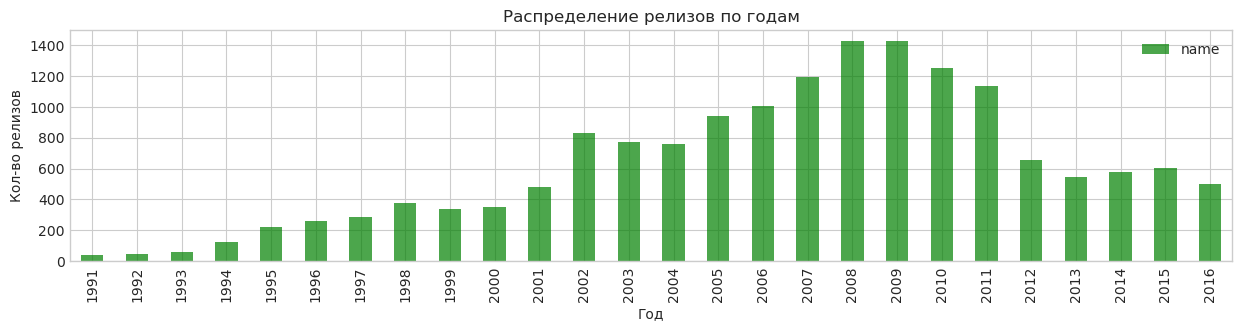

In [10]:
# Создаем скорректированное распределение по годам.
release=data.pivot_table(index='year_of_release', values=['name'], aggfunc='count')
# Визуализация
with plt.style.context('seaborn-whitegrid'):
    release.plot(kind='bar',figsize=(15,3),color='green',alpha=0.7)
plt.title('Распределение релизов по годам')
plt.ylabel('Кол-во релизов')
plt.xlabel('Год')

In [11]:

top_platform=data.pivot_table(index='platform',values='all_sales',aggfunc='sum')
top_platform.head()

,all_sales
platform,
3DO,0.10
3DS,257.81
DC,15.95
DS,802.76
GB,183.14


Text(0.5, 0, 'Год')

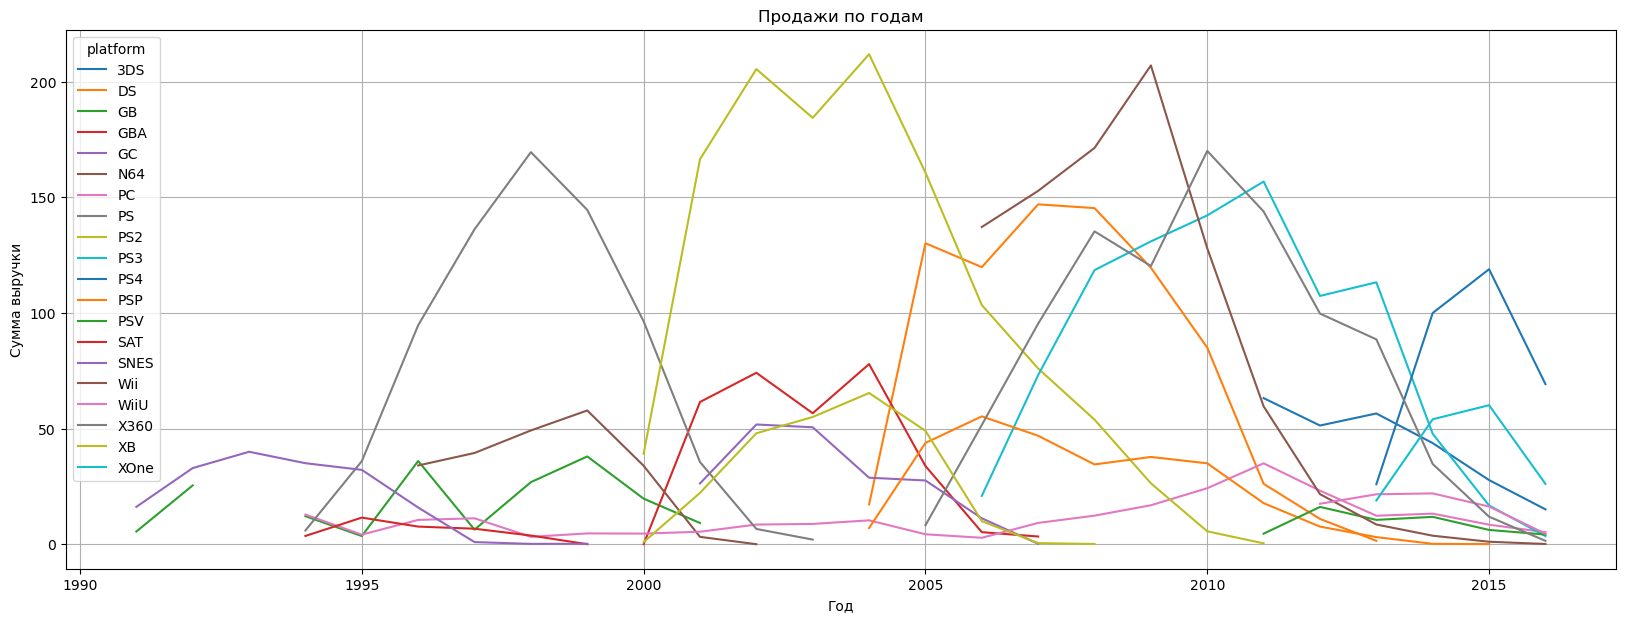

In [12]:
# Выбираем топ 20 платформ
data_short=data.join(top_platform['all_sales'].nlargest(n=20),on='platform',how='inner',rsuffix='+')
# Строим распделение продаж по платформам за период
platform_year=data_short.pivot_table(index=['year_of_release'],columns='platform', values='all_sales',aggfunc='sum')
# Визуализируем распределение
platform_year.plot( figsize=(20,7),grid= True)
plt.title('Продажи по годам')
plt.ylabel('Сумма выручки')
plt.xlabel('Год')

<b>Вывод:</b>  
Анализируя топ 20 игровых платформ, пришел к выводу что время жизни платформы от 7 до 10 лет.  
Циклы хорошо прослеживаться на эволюции платформы PS, каждый следующей релиз замедлял /останавливал продажи предыдущей версии.  Актуальным периодом для данной выборки является последние 3 года (с 2013 по 2016). В это период мы видим рост продаж новых платформ PS4 и XOne. Все остальные платформы к 2017 году уже становятся не актуальными. (продажи в отрицательном тренде)  
 

In [13]:
# Отрезаем массив данных по критерию "Актуальный период"
data=data.query('year_of_release>=2013')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Text(0.5, 0, 'Год')

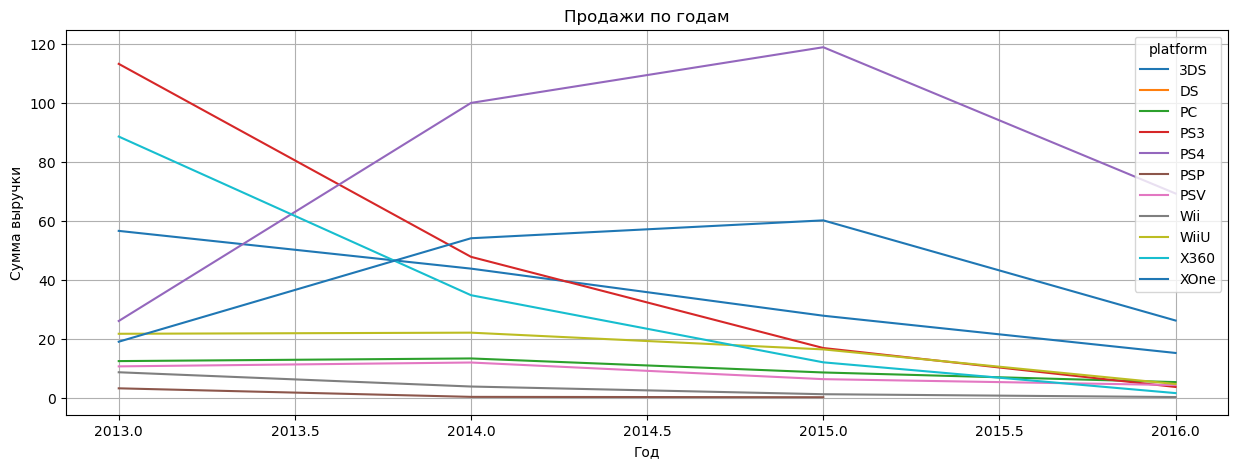

In [14]:
# Строим распределение продаж по платформам за период
platform_year=data.pivot_table(index=['year_of_release'],columns='platform', values='all_sales',aggfunc='sum')
display(platform_year.head(20))
# Визуализируем распределение
platform_year.plot( figsize=(15,5),grid= True)
plt.title('Продажи по годам')
plt.ylabel('Сумма выручки')
plt.xlabel('Год')


<b>Вывод:</b>  
    Большинство платформ в данном периоде имеют отрицательный тренд по продажам и заканчивают свой жизненный цикл.  
    Но можно выделить две платформы PS4 и XOne, которые не прошли еще 7-10 летний цикл и могут быть названы "Новыми" платформами.  
    Падение в 2016 году может быть обусловлено неполными данными в этом году. (отсутствует разбивка по месяцам и мы не можем это проверить)  
    Платформы PS4 и XOne потенциально прибыльны в бушующем периоде.


<AxesSubplot:>

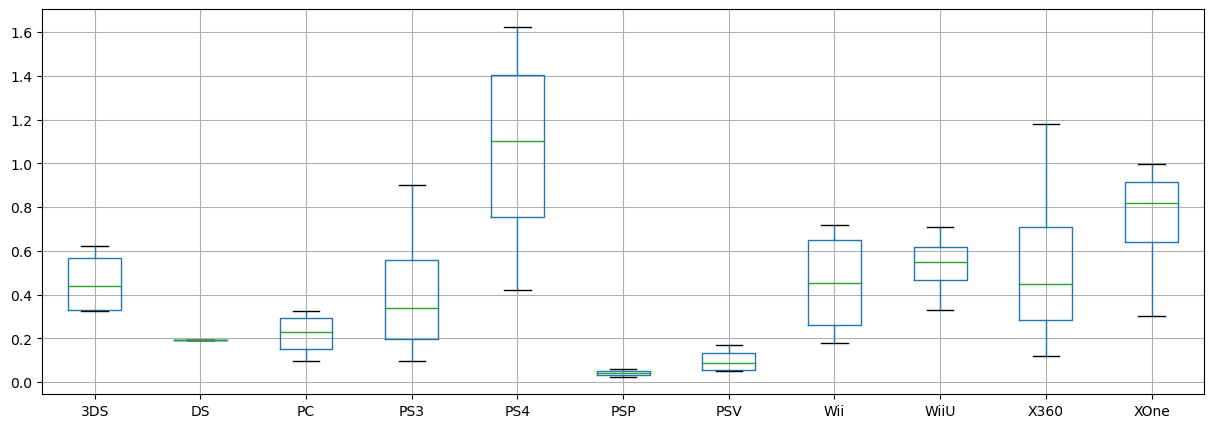

In [15]:
platform_year=data.pivot_table(index=['year_of_release'],columns='platform', values='all_sales')
platform_year.boxplot( figsize=(15,5))

<b>Вывод:</b> Чем более популярна платформа,  тем больше у нее "резлет" значений в диаграмме размаха.

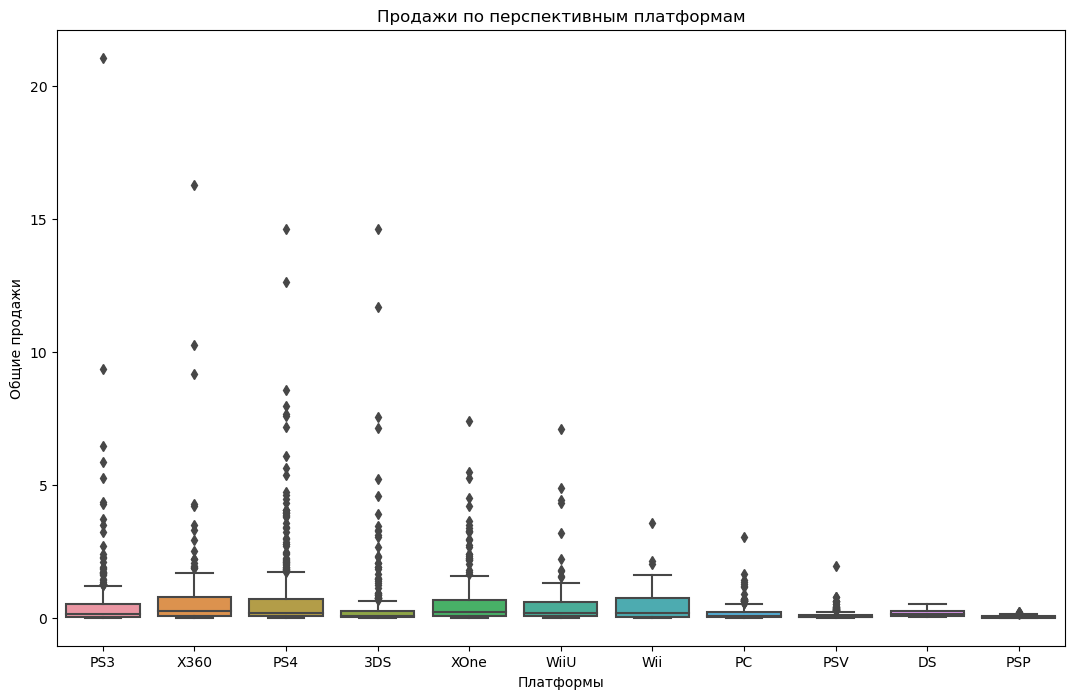

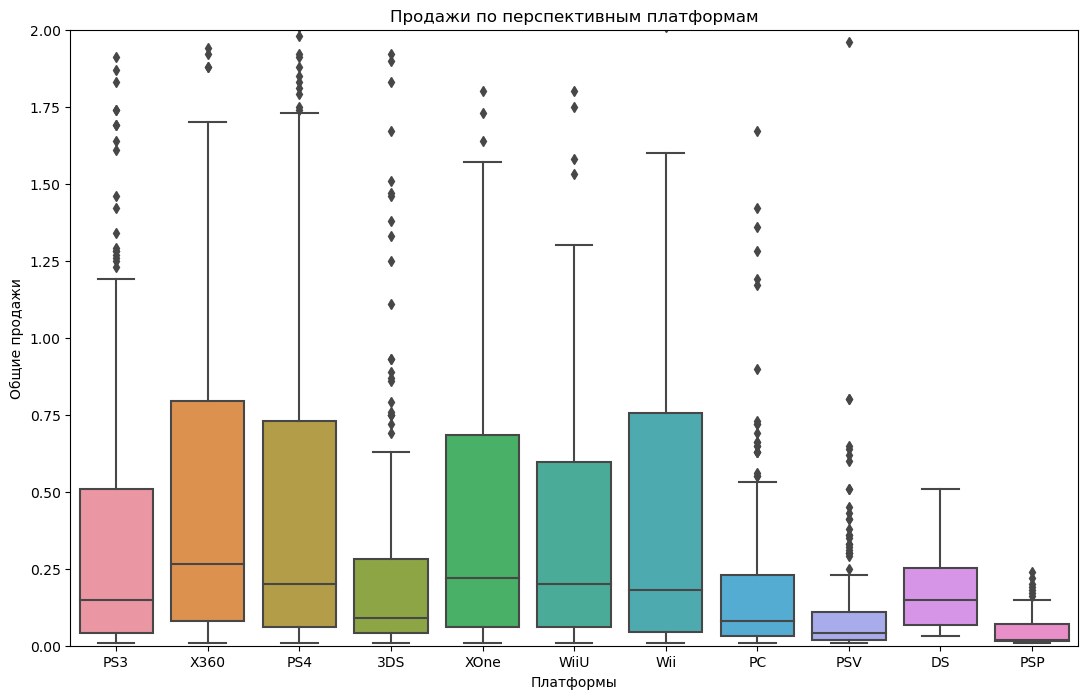

In [16]:
# Комментарий ревьюера 2
import seaborn as sns
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'all_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data, y = 'all_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 2)))
plt.show()

In [17]:
# Комментарий ревьюера
print(len(data.loc[(data['critic_score']!=-1)]))
print(len(data.loc[(data['user_score']!=-1)]))
print(len(data.loc[(data['critic_score']!=-1) & (data['user_score']!=-1)]))

991
1192
976


In [18]:
data_only_score= data.loc[(data['critic_score']!=-1) & (data['user_score']!=-1)] 
data_platform_best=data_only_score.loc[data['platform'].isin(['PS4','PS3','X360','XOne','WiiU'])]       
display(data_platform_best.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.00,2.60,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.00,2.60,M,9.36


Корреляция продаж и оценки критиков: 0.35877111593197947


Text(0.5, 9.444444444444459, 'Оценка критиков')

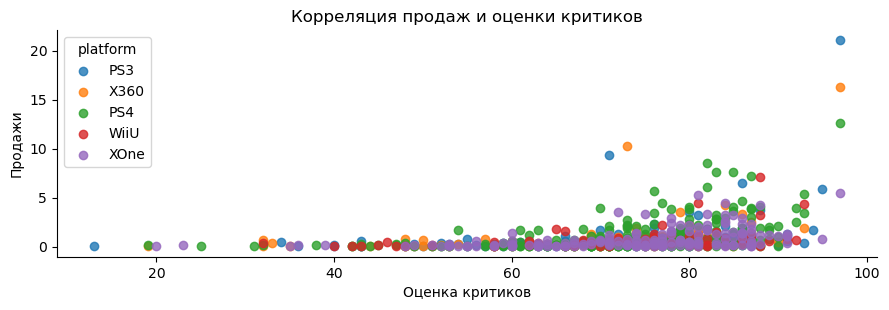

In [19]:

print("Корреляция продаж и оценки критиков:",data_platform_best['all_sales'].corr(data_platform_best['critic_score']))
sns.lmplot(y='all_sales',x='critic_score', data=data_platform_best, hue='platform', fit_reg=False, legend_out= False,height=3, aspect=3 )
plt.title('Корреляция продаж и оценки критиков')
plt.ylabel('Продажи')
plt.xlabel('Оценка критиков')
#data_PS4.plot(y='all_sales',x='critic_score', kind='scatter', figsize=(10,3))

#data_PS4.plot(y='all_sales',x='user_score', kind='scatter', figsize=(10,3))



Корреляция продаж и отзывами пользователей: 0.00121129859555441


Text(0.5, 9.444444444444459, 'Оценка пользователей')

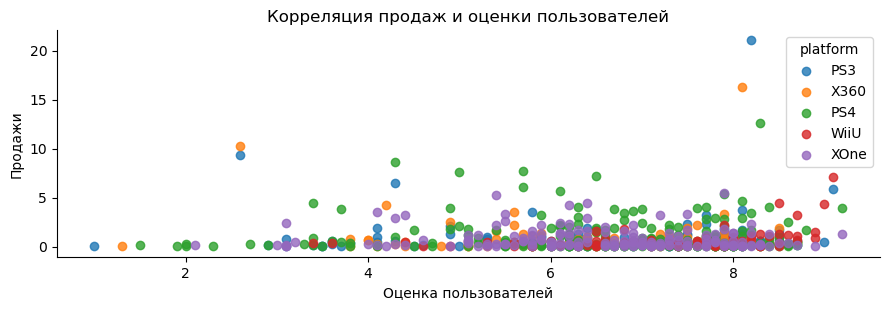

In [20]:

print("Корреляция продаж и отзывами пользователей:",data_platform_best['all_sales'].corr(data_platform_best['user_score']))
sns.lmplot(y='all_sales',x='user_score', data=data_platform_best, hue='platform', fit_reg=False, legend_out= False,height=3, aspect=3 )
plt.title('Корреляция продаж и оценки пользователей')
plt.ylabel('Продажи')
plt.xlabel('Оценка пользователей')

<b>Выводы:</b>  
Корреляция глобальных продаж и оценки критиков 35% (прямая). Так же по графику видно, что есть пороговое значение оценки критиков (70 баллов), после которой продажи "взлетают".  
Корреляции продаж с оценкой пользователе отсутствует. Можно предположить, что на оценку пользователя влияет его предрасположенность к определенному жанру игр.

In [21]:
#print(data['platform'].unique())
lis1=[]
lis2=[]
lis3=[]
for i in data_platform_best['platform'].unique():
    def korel(platform_name):
        data_platform=data_platform_best.loc[data['platform']==platform_name]   
        corr1=data_platform['all_sales'].corr(data_platform['critic_score'])
        corr2=data_platform['all_sales'].corr(data_platform['user_score'])
        return lis1.append(platform_name),lis2.append("{:.2f}".format(corr1)),lis3.append("{:.2f}".format(corr2))
    korel(i)
lis=[lis1,lis2,lis3]
d_corr = pd.DataFrame (lis).transpose()
d_corr .columns = ['platform_name', 'corr-critic','corr-user']
print(d_corr)

   

  platform_name corr-critic corr-user
0           PS3        0.33      0.02
1          X360        0.35     -0.01
2           PS4        0.41     -0.03
3          WiiU        0.38      0.41
4          XOne        0.41     -0.09


,sum_all_sales,count_game,mean_all_sales
genre,,,
Action,321.87,766,0.42
Adventure,23.64,245,0.10
Fighting,35.31,80,0.44
Misc,62.82,155,0.41
Platform,42.63,74,0.58
Puzzle,3.17,17,0.19
Racing,39.89,85,0.47
Role-Playing,145.89,292,0.50
Shooter,232.98,187,1.25


Text(0.5, 0, 'Жанры')

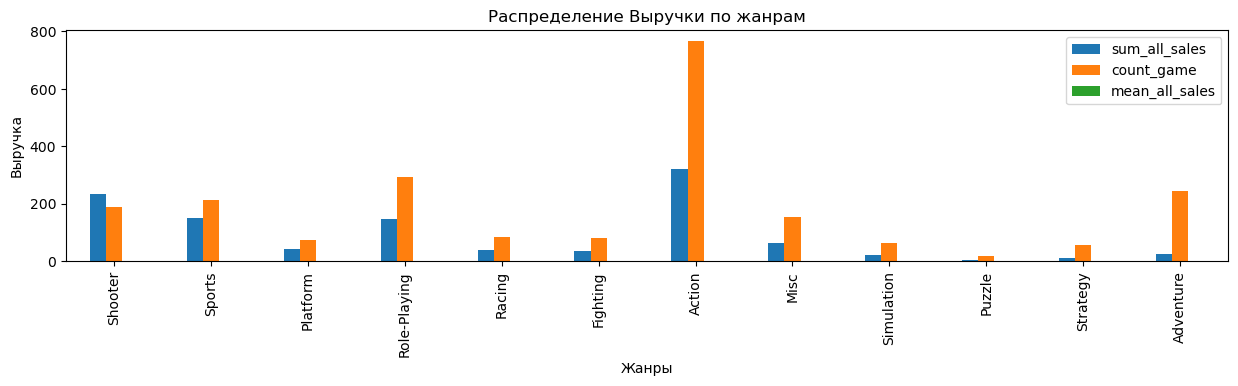

In [22]:
data_genre=data.pivot_table(index='genre',values='all_sales',aggfunc=['sum','count','mean'])
data_genre.columns = ['sum_all_sales', 'count_game','mean_all_sales']
display(data_genre.head(12))
data_genre.sort_values(by='mean_all_sales',ascending=False,inplace= True)
data_genre.plot(kind='bar',figsize=(15,3))
plt.title('Распределение Выручки по жанрам')
plt.ylabel('Выручка')
plt.xlabel('Жанры')

<b>Выводы:</b>  
Наиболее прибыльными являются 4 жанра (Action, Shooter, Role-Playing, Sports).  
Средняя оценка продаж показывает, что жанр Shooter является наиболее прибыльным на единицу выпущенной игры, а жанр Action добивается лидирующей позиции по продажам за счет огромного количества выпускаемых игр.  
Следовательно можно предположить, что жанр будет низко маржинальным. 

#### Составляем портрет пользователя каждого региона

In [23]:
rating_data=data.groupby(['platform'])[['na_sales','eu_sales','jp_sales']].sum()
rating_data_na=rating_data.sort_values(by='na_sales',ascending= False).index[:5]
rating_data_eu=rating_data.sort_values(by='eu_sales',ascending= False).index[:5]
rating_data_jp=rating_data.sort_values(by='jp_sales',ascending= False).index[:5]

In [24]:
list1=['NA','EU','JP']
list2=[rating_data_na,rating_data_eu,rating_data_jp]
list3=['na_sales','eu_sales','jp_sales']

for i in [0,1,2]:
    print('Доля продаж в',list1[i])
    r=list2[i]
    for platform in list2[i]:
        def dol(platfom_n):
            j=rating_data.query('platform==@platfom_n')[list3[i]].sum()
            k=rating_data[list3[i]].sum()
            print(platform ,"{:.2f}".format(j/k))
          
        dol(platform)
   

Доля продаж в NA
PS4 0.25
XOne 0.21
X360 0.19
PS3 0.15
3DS 0.09
Доля продаж в EU
PS4 0.36
PS3 0.17
XOne 0.13
X360 0.11
3DS 0.08
Доля продаж в JP
3DS 0.48
PS3 0.17
PSV 0.13
PS4 0.11
WiiU 0.08



<b>Вывод:</b>  
В Северной Америке и Европе предпочтения сильно отличаются от Японии. Лидирующие позиции занимает платформа PS.  
Платформа Xbox так же имеет значительную долю рынка в Америке она гораздо больше, чем в Европе.
В Японии наибольшей популярность обладает платформа Nintendo(3DS). 

In [25]:
rating_genre=data.groupby(['genre'])[['na_sales','eu_sales','jp_sales']].sum()
rating_genre_na=rating_genre.sort_values(by='na_sales',ascending= False).index[:5]
rating_genre_eu=rating_genre.sort_values(by='eu_sales',ascending= False).index[:5]
rating_genre_jp=rating_genre.sort_values(by='jp_sales',ascending= False).index[:5]


In [26]:
list1=['NA','EU','JP']
list2=[rating_genre_na,rating_genre_eu,rating_genre_jp]
list3=['na_sales','eu_sales','jp_sales']

for i in [0,1,2]:
    print('Доля продаж в',list1[i])
    r=list2[i]
    for genre in list2[i]:
        def dol(genre_n):
            j=rating_genre.query('genre==@genre_n')[list3[i]].sum()
            k=rating_genre[list3[i]].sum()
            print(genre ,"{:.2f}".format(j/k))
        dol(genre)

Доля продаж в NA
Action 0.29
Shooter 0.25
Sports 0.15
Role-Playing 0.11
Misc 0.06
Доля продаж в EU
Action 0.30
Shooter 0.22
Sports 0.15
Role-Playing 0.09
Racing 0.05
Доля продаж в JP
Role-Playing 0.36
Action 0.29
Misc 0.07
Fighting 0.05
Shooter 0.05


<b>Вывод:</b>  
В Америке и Европе схожие вкусовые предпочтения по жанрам игр. Топовые позиции занимают игры жанров:
    Action, 
    Shooter, 
    Sports, 
    Role-Playing  
В Японии приоритет отдается жанрам: Role-Playing, Action, Misc


In [27]:
rating_esrb=data.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
rating_esrb

,eu_sales,jp_sales,na_sales
rating,,,
E,83.36,15.14,79.05
E10+,42.69,5.89,54.24
M,145.32,14.11,165.21
RP,78.91,85.05,89.42
T,41.95,20.59,49.79


<b>Вывод:</b>  
Возрастной рейтинг в основном охватывает рынки Америки и Европы и для них долевое распределение рейтинга выглядит довольно стабильным. Для рынка Японии характерно отсутствие рейтинга. 

#### Проверка гипотез

Нулевая гипотеза: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.
Альтернативная гипотеза: Средний пользовательский рейтинг платформы Xbox One  не равен среднему пользовательскому рейтингу платформы PC.    

In [28]:
data_XOne=data_only_score.loc[data['platform']=='XOne']
data_PS4=data_only_score.loc[data['platform']=='PS4']
alpha = 0.05
results = st.ttest_ind(data_XOne['user_score'],data_PS4['user_score'], equal_var = False)
print('P-value:', results.pvalue)
print('Средний рейтинг XOne:',data_XOne['user_score'].mean())
print('Средний рейтинг PS4:',data_PS4['user_score'].mean())
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.12950828207699422
Средний рейтинг XOne: 6.538181818181819
Средний рейтинг PS4: 6.74979919678715
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.
Альтернативная гипотеза: Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

In [29]:
data_Action=data_only_score.loc[data['genre']=='Action']
data_Sports=data_only_score.loc[data['genre']=='Sports']
alpha = 0.05
results = st.ttest_ind(data_Action['user_score'],data_Sports['user_score'], equal_var = False)
print('P-value:', results.pvalue)
print('Средний рейтинг Action:',data_Action['user_score'].mean())
print('Средний рейтинг Sports:',data_Sports['user_score'].mean())
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 1.0496920005008588e-13
Средний рейтинг Action: 6.936245954692556
Средний рейтинг Sports: 5.665454545454544
Отвергаем нулевую гипотезу


#### Выводы:
Из проведенного Анализа мы можем сказать, что наиболее перспективными для западного рынка являются платформы XBox и РS.  
Для Японии лидерство сохраняется за 3DS, но популярность платформы PS тоже присутствует. 
По жанрам также есть отличие, описанное в выводах выше. Глобальный вывод сделать ставку в развитие жанра Action, так как о достаточно популярен во всем мире. Средняя маржинальность жанра не высокая! 
В процессе исследования были проведены проверки гипотез. Мы не смогли отвергнуть гипотезу о равенстве рейтинга у XOne и PS4 и подтвердить равенство рейтингов в жанре Action и Sports.
Резюмирую: Игра имеет больше шансов на успех есть выйдет на платформе ps4 и новее в жанре Action. 
